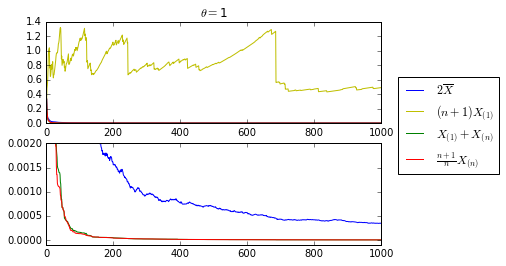

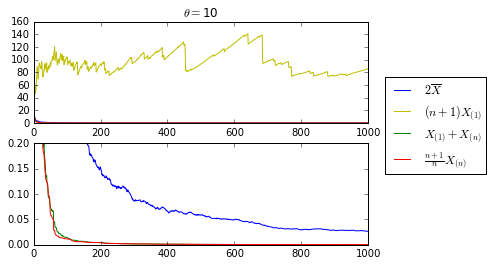

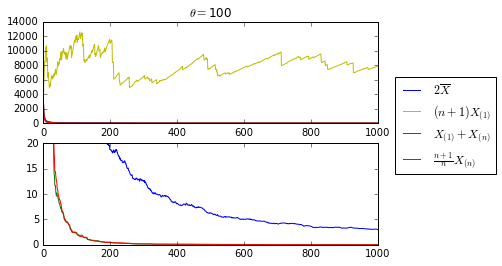

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

M = 100
N = 1000
OX = [i + 1 for i in range(N)]
colors = ['b','y','g','r']
description = [r'$2\overline{X}$',
             r'$(n+1)X_{(1)}$',
             r'$X_{(1)}+X_{(n)}$',
             r'$\frac{n+1}{n}X_{(n)}$']

def build_plot(OY , theta) :
    plt.subplot(211) #all evaluations
    plt.title(r"$\theta = $" + str(theta))

    for i in range(4): 
        plt.plot(OX,OY[i],colors[i],label = description[i])
    plt.legend(loc=(1.05,-0.5))
    plt.subplot(212) #good evaluations(состоятельные)
    plt.axis([0, N, -0.0001, 0.002 * theta**2])  
    for i in range(4): 
        if i == 1 : 
            continue;
        plt.plot(OX,OY[i],colors[i])
    

    plt.show()

def loss_f(expected , real) :
    return (expected - real)**2

def calc_evaluations(X):
    evl = [np.zeros(N) for i in range(4)]
    s = 0
    mmin = X[0]
    mmax = X[0]
    for n in range(1,N + 1):
        s += X[n-1]
        mmin = min(mmin,X[n-1])
        mmax = max(mmax,X[n-1])
        evl[0][n-1] =  2 * s / n
        evl[1][n-1] = (n+1) * mmin
        evl[2][n-1] =  mmin + mmax
        evl[3][n-1] = (n+1)/ n * mmax
    return evl

def calc_avg(X) :
    ssum = 0
    for x in X :
        ssum += x
    return ssum / len(X)

def main_task(theta):
    X = [stats.uniform.rvs(scale = theta, size = N) for i in range(M)]
    evl = [calc_evaluations(X[i]) for i in range(M)]
    avg_loss = [[
            calc_avg([loss_f(evl[m][num_evl][n] , theta) for m in range(M)])
            for n in range(N)]
            for num_evl in range(4)]
    build_plot(avg_loss , theta)
    
theta = [1 , 10 , 100]
for i in range(len(theta)):
    main_task(theta[i])
    
# вывод: 
# оценки (3 и 4) для всех рассмотренных параметров имеют меньшие величины функции потерь
# функция потерь для оценки 2 не стремится к 0
    